In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy import constants as const

import uncertainties as unc  
import uncertainties.unumpy as unumpy  

%matplotlib inline

In [2]:
# DESI relative errors on  dA/s and Hs from Table V of https://arxiv.org/pdf/1308.4164.pdf

z_ary = np.arange(0.15, 1.95, .10)
sigma_dA_div_s_rel_ary = .01*np.array([2.78, 1.87, 1.45, 1.19, 1.01, 0.87, 0.77, 0.76, 0.88, 0.91, 0.91, 0.91, 1.00, 1.17, 1.50, 2.36, 3.62, 4.79])
sigma_H_s_rel_ary = .01*np.array([5.34, 3.51, 2.69, 2.20, 1.85, 1.60, 1.41, 1.35, 1.42, 1.41, 1.38, 1.36, 1.46, 1.66, 2.04, 3.15, 4.87, 6.55])

In [3]:
cosmo = FlatLambdaCDM(H0=69, Om0=0.3, m_nu=20*u.meV)

In [4]:
s = 150*u.Mpc # BAO scale

# Fiducial values for dA/s and Hs
dA_div_s_ary = np.array([(cosmo.angular_diameter_distance(z)/s).value for z in z_ary])
H_s_ary = np.array([(cosmo.H(z)*s/const.c*1000).value for z in z_ary])

# Absolute errors on dA/s and Hs
sigma_dA_div_s_ary = sigma_dA_div_s_rel_ary*dA_div_s_ary
sigma_H_s_ary = sigma_H_s_rel_ary*H_s_ary

In [20]:
# Defines dA and H arrays
da=dA_div_s_ary*s.value
hh=H_s_ary/s.value
zz=z_ary

# Defines absolute error arrays
err_da=sigma_dA_div_s_ary*s.value
err_hh=sigma_H_s_ary/s.value
err_zz=np.zeros(len(z_ary))

# Defines arrays holding the values *and* errors  
da=unumpy.uarray( da, err_da )  
hh=unumpy.uarray( hh, err_hh )  
zz=unumpy.uarray( zz, err_zz )  

dv=(zz*(1+zz)**2*da**2*hh**-1)**(1./3)

# Get the propagated absolute error on dv  
err_dv=unumpy.std_devs(dv)  
val_v=unumpy.nominal_values(dv)  

err_s_d_div_dv=unumpy.std_devs(s.value/dv)  

# Save absolute errors
np.savetxt("../curves_DESI/DESI_sigma_dV.txt", [z_ary, err_dv])
np.savetxt("../curves_DESI/DESI_sigma_dA.txt", [z_ary, err_da])
np.savetxt("../curves_DESI/DESI_sigma_H.txt", [z_ary, err_hh])

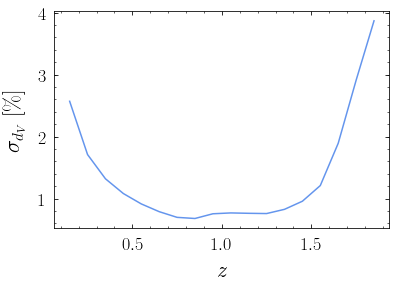

In [21]:
# Relative DESI errors

plt.plot(z_ary, err_dv/val_v*100.)
plt.xlabel("$z$")
plt.ylabel("$\sigma_{d_V}$ [\%]")

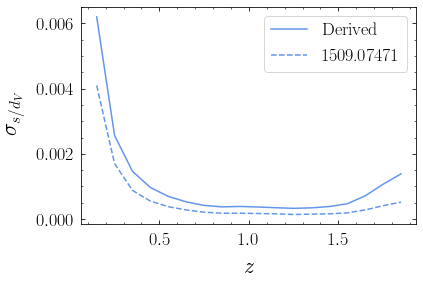

In [26]:
sigma_s_div_dv_old = np.array([0.0041, 0.0017, 0.00088, 0.00055, 0.00038, 0.00028, 0.00021, 0.00018, 0.00018, 0.00017, 0.00016, 0.00014, 0.00015, 0.00016, 0.00019, 0.00028, 0.00041, 0.00052])

plt.plot(z_ary, err_s_d_div_dv, label="Derived")
plt.plot(z_ary, sigma_s_div_dv_old, c='cornflowerblue',ls='--', label='1509.07471')
plt.legend(fancybox=True)

plt.xlabel("$z$")
plt.ylabel("$\sigma_{s/d_V}$")

/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


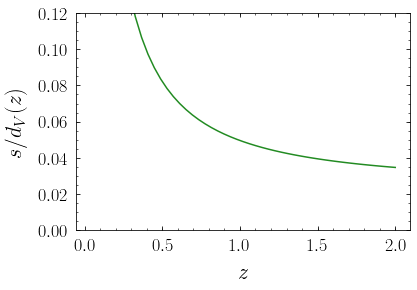

In [14]:
dV_a = lambda z: ((z*(1+z)**2*cosmo.angular_diameter_distance(z)**2*(cosmo.H(z)/const.c)**-1)**(1./3))/10.
z_plt_ary = np.linspace(0,2)
plt.plot(z_plt_ary, s.value/np.array([dV_a(z).value for z in z_plt_ary]), c='forestgreen')
plt.ylim(0,.12)
plt.xlabel("$z$")
plt.ylabel("$s/d_V(z)$")

(300, 2000)

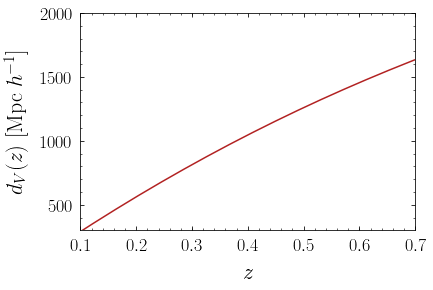

In [15]:
plt.plot(z_plt_ary, cosmo.h*np.array([dV_a(z).value for z in z_plt_ary]), c='firebrick')
plt.xlabel("$z$")
plt.ylabel("$d_V(z)$ [Mpc $h^{-1}$]")
plt.xlim(.1,.7)
plt.ylim(300,2000)

In [16]:
dV_a(.2).value*cosmo.h

561.8804865981591